Some typical NumPy 'random' functions:

In [1]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)
    
# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

[[0.13736121 0.97023623]
 [0.56378112 0.96498462]
 [0.47229981 0.28051829]]
[ 1.72024347  0.35370028 -0.02204787 -0.79123331  1.00240837]
[55 19 71 78 21 92 76 63 46 99]
[5 8 8]
[ 0.86338198  0.32787862  0.1032505  -0.0949357   0.40273986  0.01234926
  1.81466693  0.52702136 -0.12382423  0.86475191]
None


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [2]:
import random as rd
import time
import pandas as pd
import numpy as np


start1 = time.time()
np_data = np.random.randint(1, 100, 1000000)  
end1 = time.time()

start2 = time.time()
rd_data = [rd.randint(1, 101) for _ in range(1000000)] 
df = pd.DataFrame(rd_data, columns=['randomNumber'])
end2 = time.time()


if end1 - start1 < end2 - start2:
    print("np fast")
else:
    print("rd fast")


np fast


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

Sleep Duration                 7.132086
Systolic blood pressure      128.553476
Diastolic blood pressure      84.649733
Heart Rate                    70.165775
Daily Steps                 6816.844920
dtype: float64
Sleep Duration: 7.132085561497325
Systolic Blood Pressure: 128.55347593582889
Diastolic Blood Pressure: 84.64973262032086
Heart Rate: 70.16577540106952
Daily Steps: 6816.844919786096


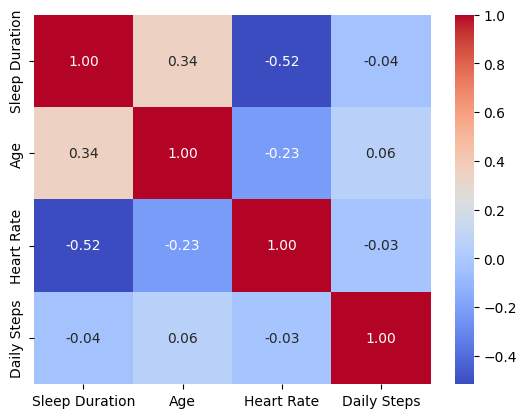

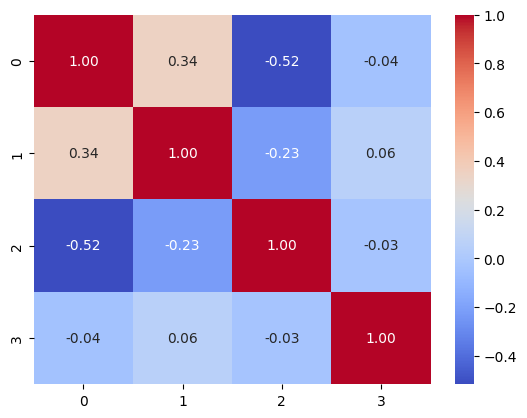

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Write your code for AIM #2 here
df = pd.read_csv("sleep_health.csv")
means = df[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].mean()
print(means)
# Loading the CSV file as an array in NumPy
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)
sleep_duration_mean = np.mean(data['Sleep_Duration'])
systolic_bp_mean = np.mean(data['Systolic_blood_pressure'])
diastolic_bp_mean = np.mean(data['Diastolic_blood_pressure'])
heart_rate_mean = np.mean(data['Heart_Rate'])
daily_steps_mean = np.mean(data['Daily_Steps'])

print(f"Sleep Duration: {sleep_duration_mean}")
print(f"Systolic Blood Pressure: {systolic_bp_mean}")
print(f"Diastolic Blood Pressure: {diastolic_bp_mean}")
print(f"Heart Rate: {heart_rate_mean}")
print(f"Daily Steps: {daily_steps_mean}")

# Create separate arrays for the individual columns that you want to operate on
# For example, to create a separate array for 'Age' column
plt.figure()
age = data['Age'].astype(int)
correlation_matrix = df[['Sleep Duration', 'Age', 'Heart Rate', 'Daily Steps']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


# Calculate the correlation in NumPy using np.corrcoef()
sleep_duration = data['Sleep_Duration']
age = data['Age']
heart_rate = data['Heart_Rate']
daily_steps = data['Daily_Steps']
data_matrix = np.vstack((sleep_duration, age, heart_rate, daily_steps))
correlation_matrix1 = np.corrcoef(data_matrix)
plt.figure()
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()



In [4]:
pd_start_time = time.time()
df = pd.read_csv("sleep_health.csv")
std_sleep_duration = df['Sleep Duration'].std()

pd_end_time = time.time()
pandas_time = pd_end_time - pd_start_time
print(f"Standard deviation of Sleep Duration (using pandas): {std_sleep_duration}")
print(f"Time taken by pandas: {pandas_time} seconds")



np_start_time = time.time()
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=1, names=True, dtype=None, encoding='utf-8')
std_sleep_duration_numpy = np.std(sleep_duration, ddof=1)

np_end_time = time.time()
numpy_time = np_end_time - np_start_time
print(f"Standard deviation of Sleep Duration (using NumPy): {std_sleep_duration_numpy}")
print(f"Time taken by NumPy: {numpy_time} seconds")

if pandas_time < numpy_time:
    print("Pandas is faster")
else:
    print("NumPy is faster")

Standard deviation of Sleep Duration (using pandas): 0.7956567308898189
Time taken by pandas: 0.00643610954284668 seconds
Standard deviation of Sleep Duration (using NumPy): 0.7956567308898189
Time taken by NumPy: 0.009959697723388672 seconds
Pandas is faster


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

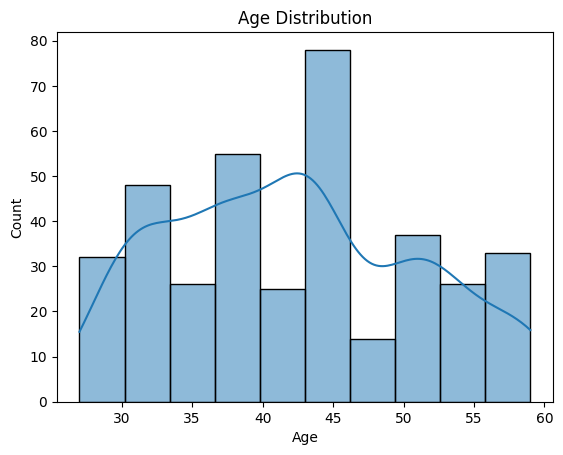

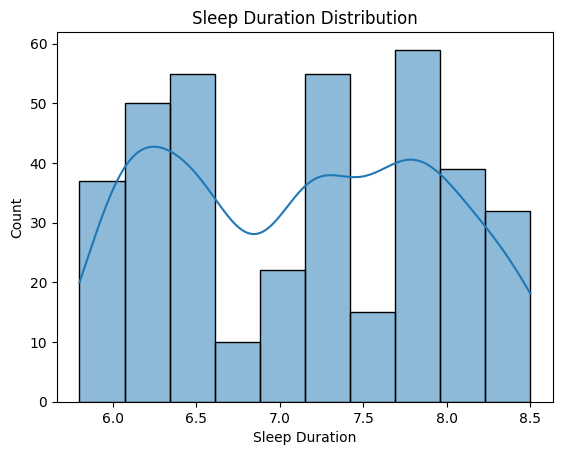

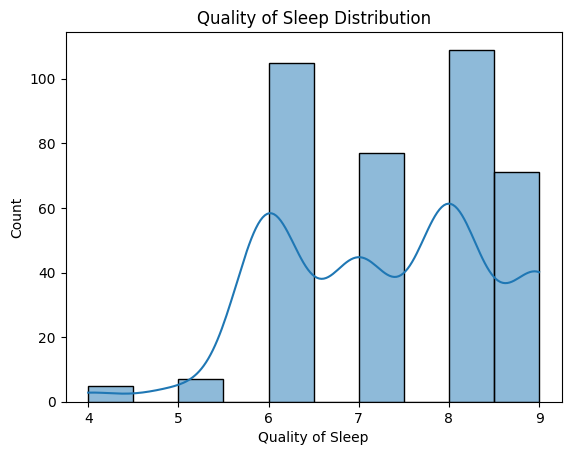

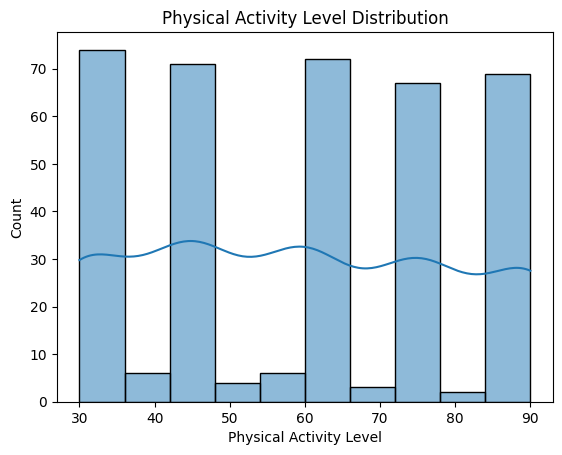

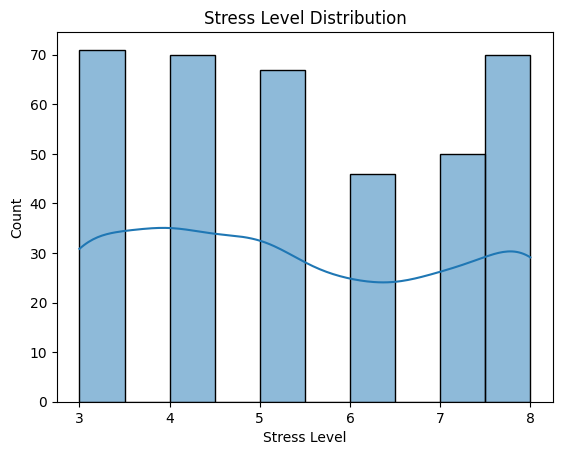

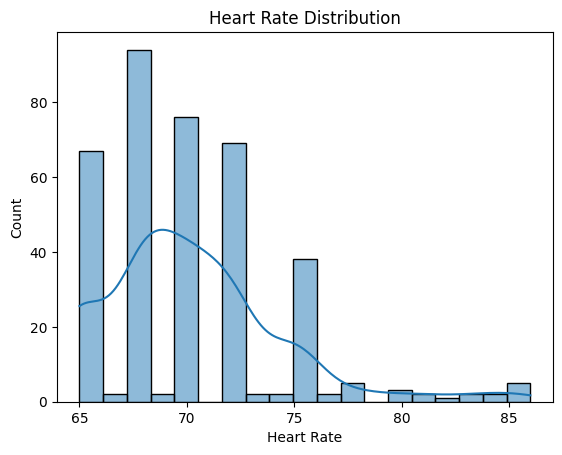

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with pandas
df = pd.read_csv('sleep_health.csv')

# 1.1. Plot distribution of Age
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# 1.2. Plot distribution of Sleep Duration
sns.histplot(df['Sleep Duration'], kde=True)
plt.title('Sleep Duration Distribution')
plt.show()

# 1.3. Plot distribution of Quality of Sleep
sns.histplot(df['Quality of Sleep'], kde=True)
plt.title('Quality of Sleep Distribution')
plt.show()

# 1.4. Plot distribution of Physical Activity Level
sns.histplot(df['Physical Activity Level'], kde=True)
plt.title('Physical Activity Level Distribution')
plt.show()

# 1.5. Plot distribution of Stress Level
sns.histplot(df['Stress Level'], kde=True)
plt.title('Stress Level Distribution')
plt.show()

# 1.6. Plot distribution of Heart Rate
sns.histplot(df['Heart Rate'], kde=True)
plt.title('Heart Rate Distribution')
plt.show()


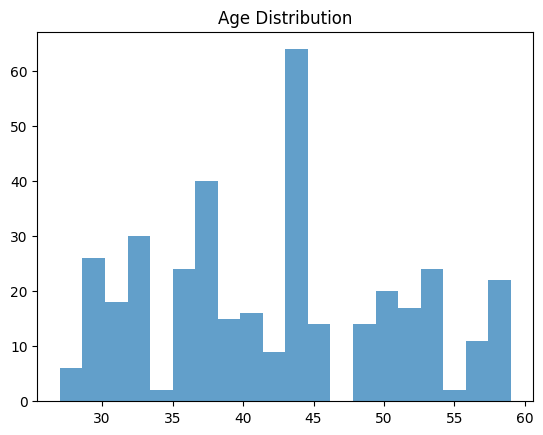

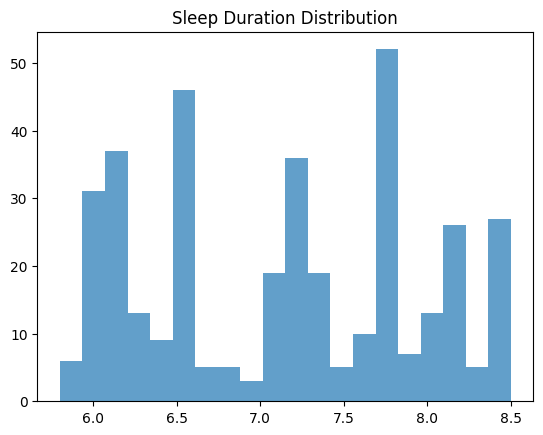

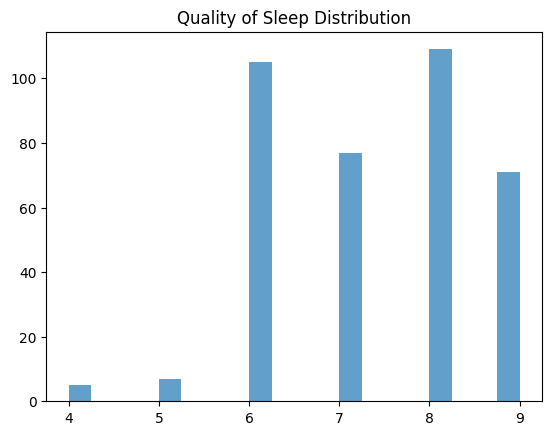

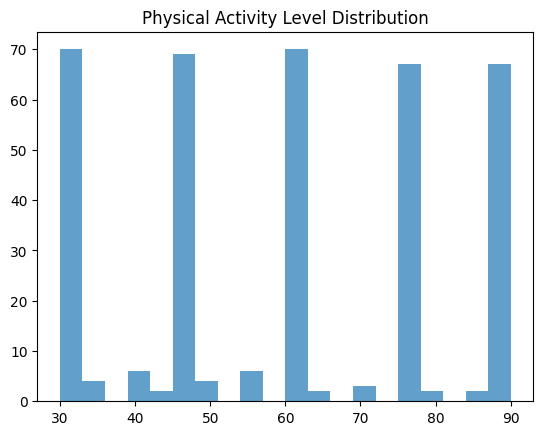

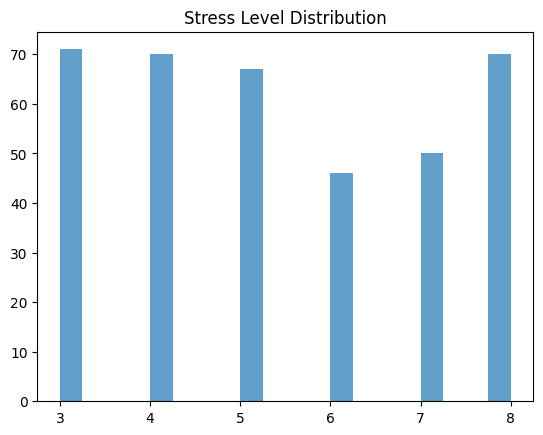

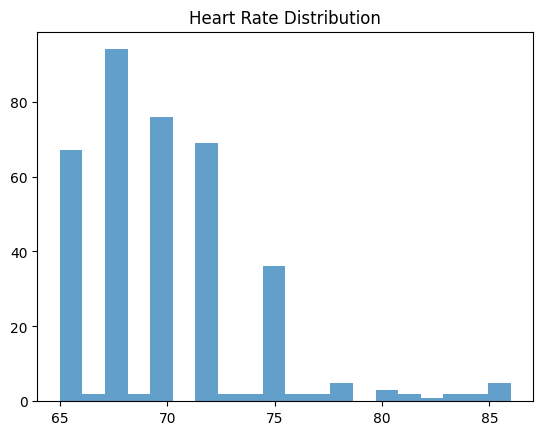

In [6]:
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, names=True, dtype=None, encoding='utf-8')
#print(data)  
cleaned_data = {name.strip(): data[name] for name in data.dtype.names}
#print(cleaned_data)
plt.hist(cleaned_data['Age'], bins=20, alpha=0.7)
plt.title('Age Distribution')
plt.show()

# 2.2. Sleep Duration Distribution
plt.hist(cleaned_data['Sleep_Duration'], bins=20, alpha=0.7)
plt.title('Sleep Duration Distribution')
plt.show()

# 2.3. Quality of Sleep Distribution
plt.hist(cleaned_data['Quality_of_Sleep'], bins=20, alpha=0.7)
plt.title('Quality of Sleep Distribution')
plt.show()

# 2.4. Physical Activity Level Distribution
plt.hist(cleaned_data['Physical_Activity_Level'], bins=20, alpha=0.7)
plt.title('Physical Activity Level Distribution')
plt.show()

# 2.5. Stress Level Distribution
plt.hist(cleaned_data['Stress_Level'], bins=20, alpha=0.7)
plt.title('Stress Level Distribution')
plt.show()

# 2.6. Heart Rate Distribution
plt.hist(cleaned_data['Heart_Rate'], bins=20, alpha=0.7)
plt.title('Heart Rate Distribution')
plt.show()


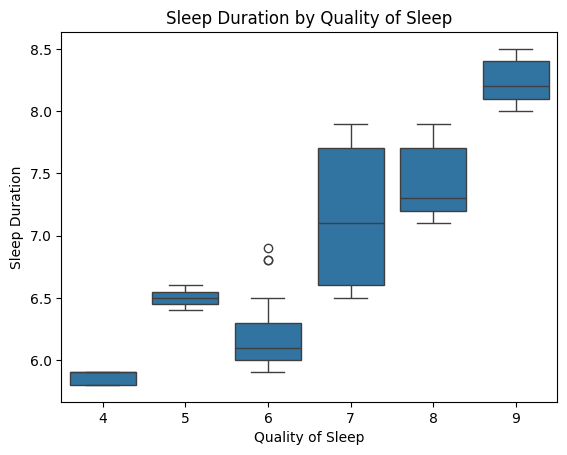

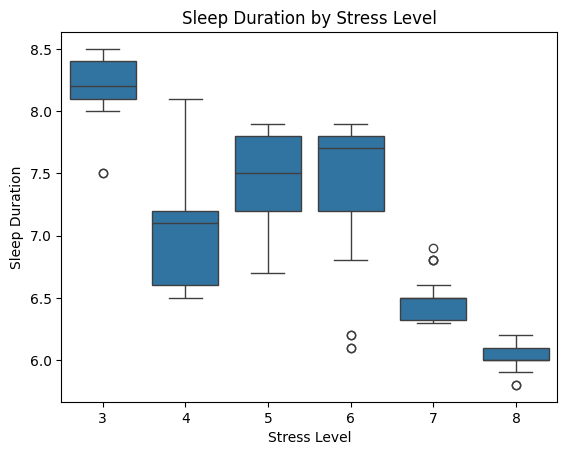

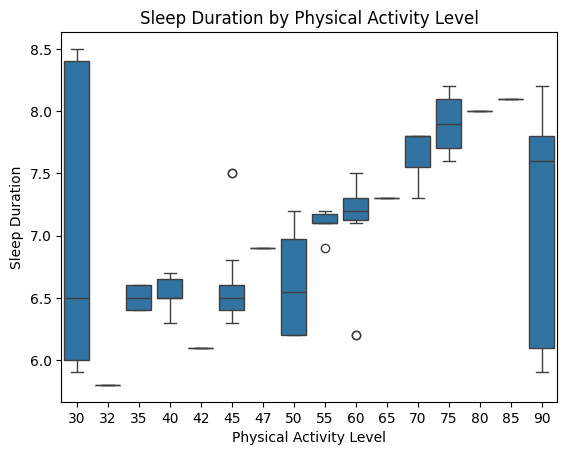

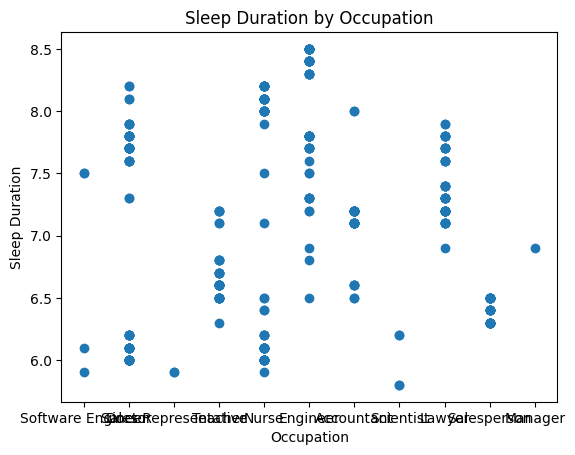

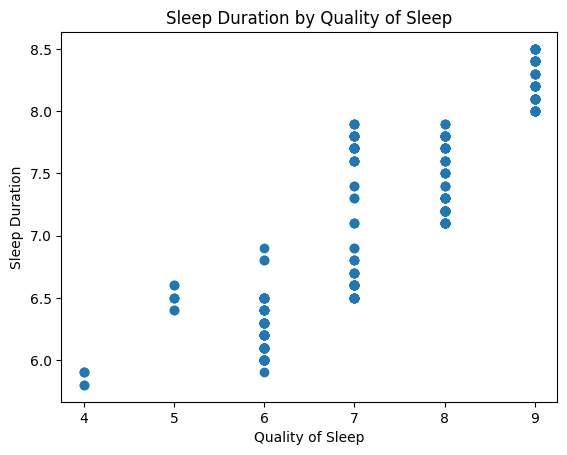

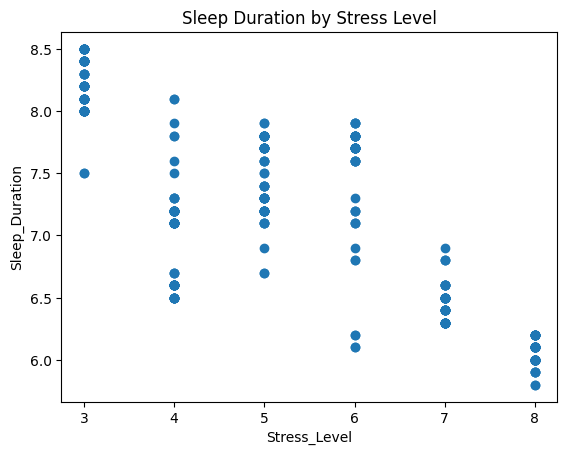

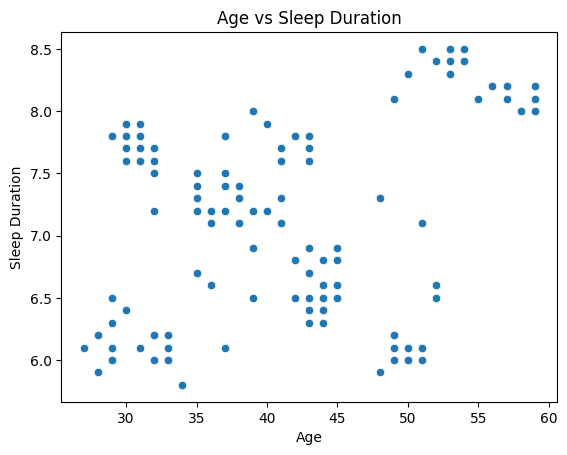

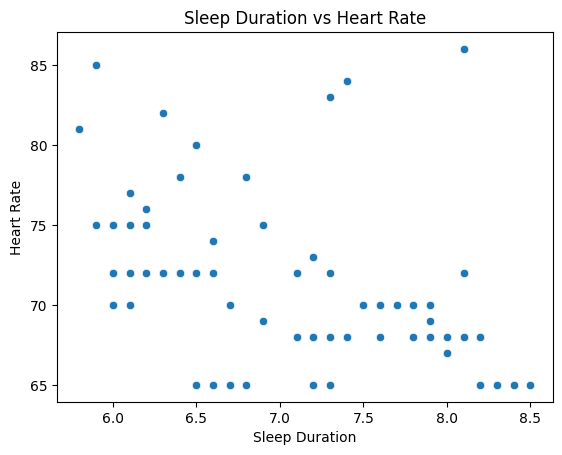

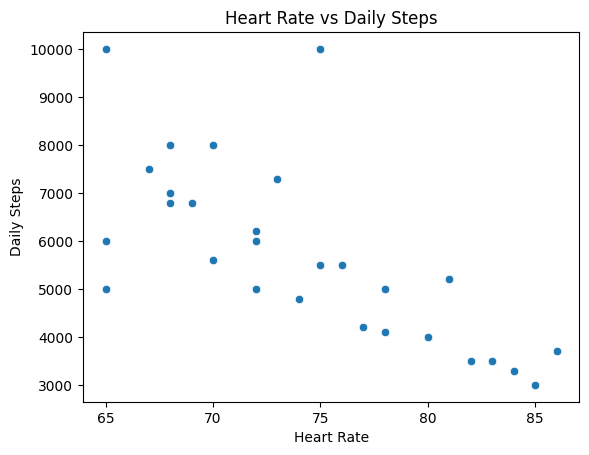

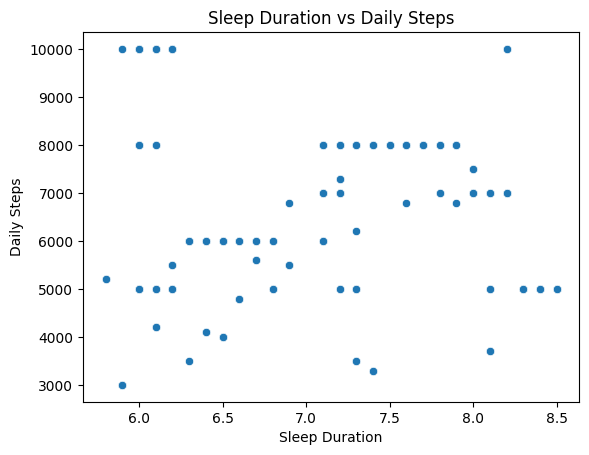

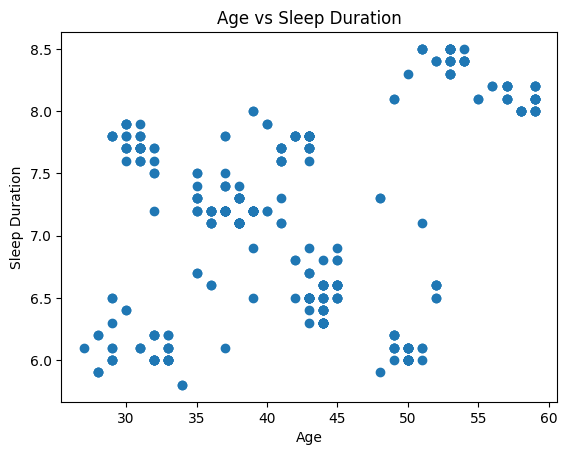

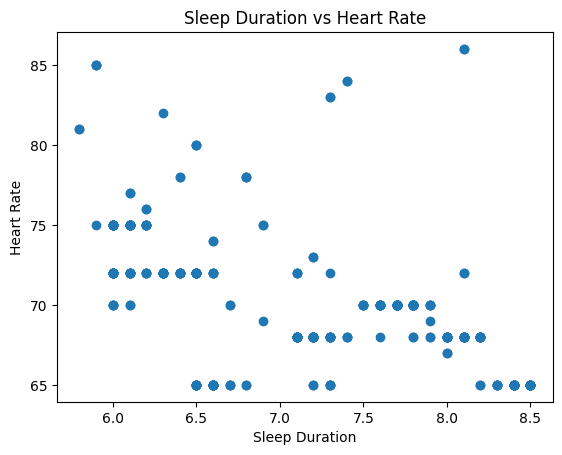

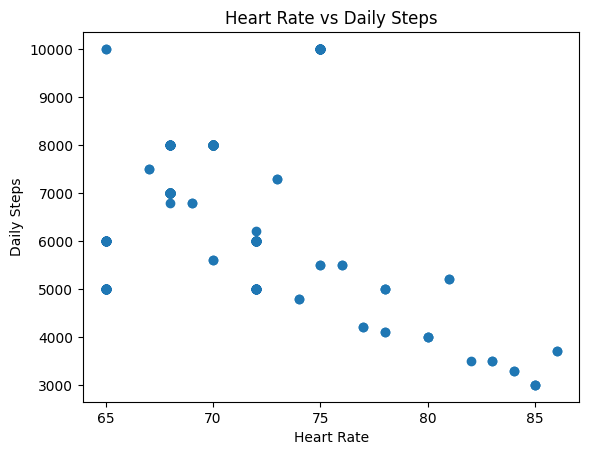

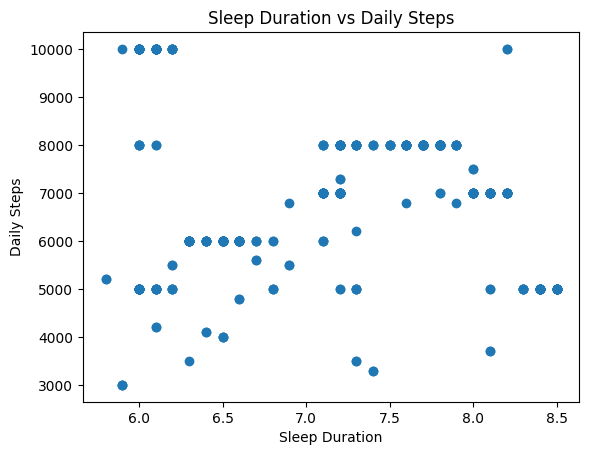

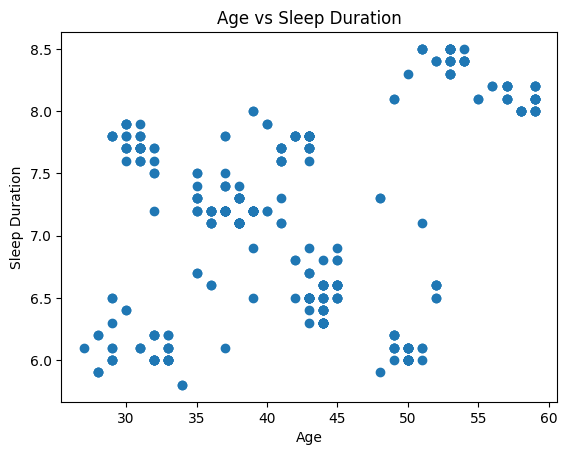

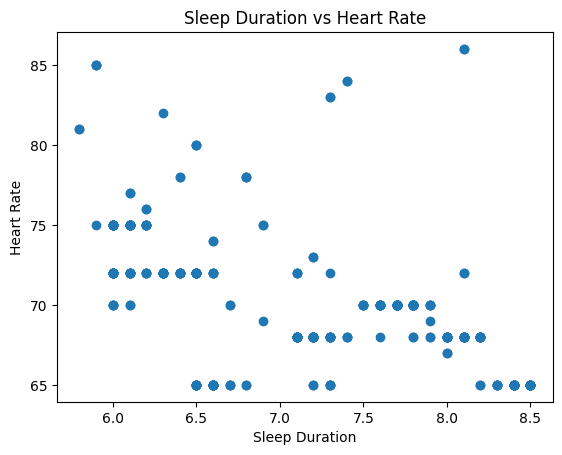

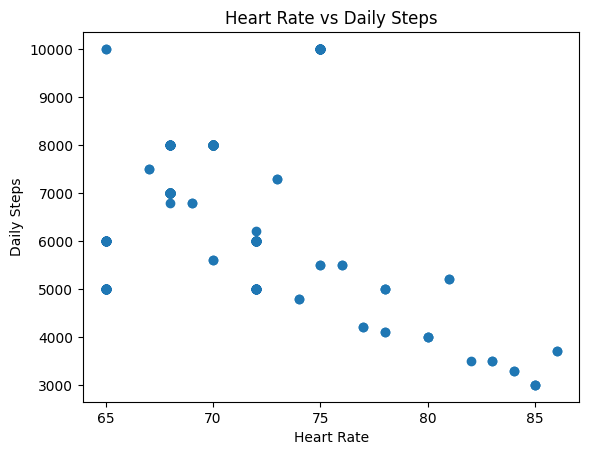

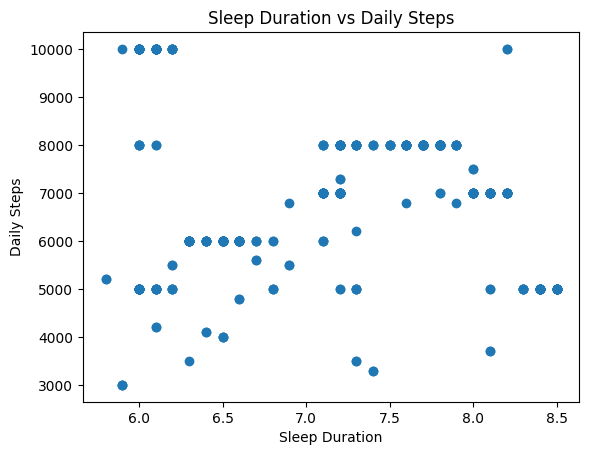

In [7]:
# 3.1. Sleep Duration based on Quality of Sleep
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Quality of Sleep')
plt.show()

# 3.2. Sleep Duration based on Stress Level
sns.boxplot(x='Stress Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Stress Level')
plt.show()

# 3.3. Sleep Duration based on Physical Activity Level
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Physical Activity Level')
plt.show()


plt.scatter(df['Occupation'], df['Sleep Duration'])
plt.title('Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration')
plt.show()

np_start_time = time.time()
# Extract categories
quality_of_sleep = data['Quality_of_Sleep']
stress_level = data['Stress_Level']
physical_activity = data['Physical_Activity_Level']
occupation = data['Occupation']
bmi = data['BMI_Category']

# 4.1. Sleep Duration based on Quality of Sleep
plt.scatter(quality_of_sleep, data['Sleep_Duration'])
plt.title('Sleep Duration by Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration')
plt.show()

# 4.2. Sleep Duration based on Stress Level
plt.scatter(stress_level, data['Sleep_Duration'])
plt.title('Sleep Duration by Stress Level')
plt.xlabel('Stress_Level')
plt.ylabel('Sleep_Duration')
plt.show()


# 5.1. Age and Sleep Duration
sns.scatterplot(x='Age', y='Sleep Duration', data=df)
plt.title('Age vs Sleep Duration')
plt.show()

# 5.2. Sleep Duration and Heart Rate
sns.scatterplot(x='Sleep Duration', y='Heart Rate', data=df)
plt.title('Sleep Duration vs Heart Rate')
plt.show()

# 5.3. Heart Rate and Daily Steps
sns.scatterplot(x='Heart Rate', y='Daily Steps', data=df)
plt.title('Heart Rate vs Daily Steps')
plt.show()

# 5.4. Sleep Duration and Daily Steps
sns.scatterplot(x='Sleep Duration', y='Daily Steps', data=df)
plt.title('Sleep Duration vs Daily Steps')
plt.show()


# 5.1. Age and Sleep Duration
plt.scatter(data['Age'], data['Sleep_Duration'])
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.show()

# 5.2. Sleep Duration and Heart Rate
plt.scatter(data['Sleep_Duration'], data['Heart_Rate'])
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration')
plt.ylabel('Heart Rate')
plt.show()

# 5.3. Heart Rate and Daily Steps
plt.scatter(data['Heart_Rate'], data['Daily_Steps'])
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate')
plt.ylabel('Daily Steps')
plt.show()

# 5.4. Sleep Duration and Daily Steps
plt.scatter(data['Sleep_Duration'], data['Daily_Steps'])
plt.title('Sleep Duration vs Daily Steps')
plt.xlabel('Sleep Duration')
plt.ylabel('Daily Steps')
plt.show()


# 5.1. Age and Sleep Duration
plt.scatter(data['Age'], data['Sleep_Duration'])
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.show()

# 5.2. Sleep Duration and Heart Rate
plt.scatter(data['Sleep_Duration'], data['Heart_Rate'])
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration')
plt.ylabel('Heart Rate')
plt.show()

# 5.3. Heart Rate and Daily Steps
plt.scatter(data['Heart_Rate'], data['Daily_Steps'])
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate')
plt.ylabel('Daily Steps')
plt.show()

# 5.4. Sleep Duration and Daily Steps
plt.scatter(data['Sleep_Duration'], data['Daily_Steps'])
plt.title('Sleep Duration vs Daily Steps')
plt.xlabel('Sleep Duration')
plt.ylabel('Daily Steps')
plt.show()


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



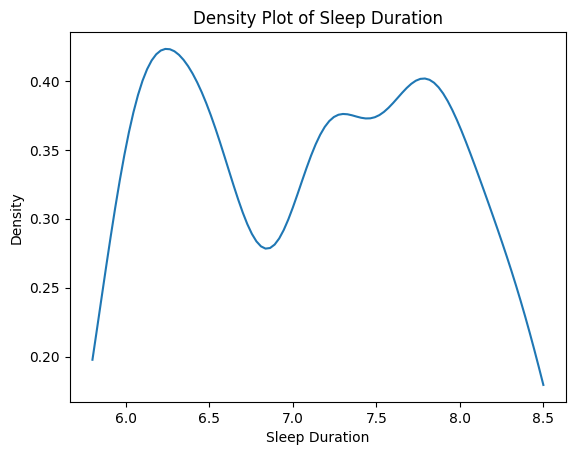

In [11]:
from scipy.stats import gaussian_kde

density = gaussian_kde(data['Sleep_Duration'])
x_vals = np.linspace(min(data['Sleep_Duration']), max(data['Sleep_Duration']), 100)
plt.plot(x_vals, density(x_vals))
plt.title('Density Plot of Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Density')
plt.show()